In [1]:
from __future__ import print_function
import pylab as pl
import pandas as pd
import numpy as np
import zipfile

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
datestring = '201501' #January 2015 data
!curl -O "https://s3.amazonaws.com/tripdata/{datestring}-citibike-tripdata.zip"

zf = zipfile.ZipFile(datestring+'-citibike-tripdata.zip')
df = pd.read_csv(zf.open(datestring+'-citibike-tripdata.csv'))

df.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6845k  100 6845k    0     0  14.5M      0 --:--:-- --:--:-- --:--:-- 24.3M


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [3]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [6]:
# Create dataframe with age of rider 
df['age'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber')]

In [7]:
df.drop ([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],axis=1, inplace=True)
df.head()

,age
0,55.0
1,52.0
2,41.0
3,46.0
4,38.0


In [11]:
df['age'].dropna(inplace= True)
df.describe()

,age
count,279924.000000
mean,40.048581
std,11.574637
min,16.000000
25%,NaN
50%,NaN
75%,NaN
max,116.000000


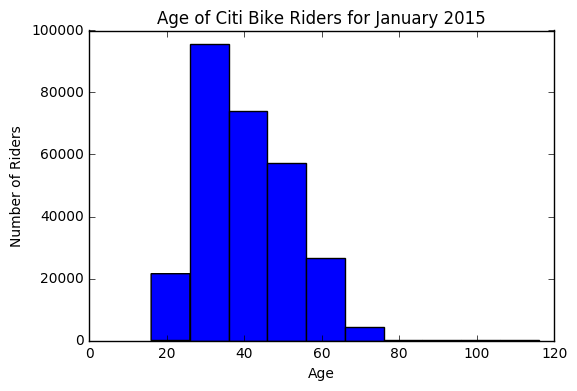

In [42]:
pl.hist(df.age)
pl.title('Age of Citi Bike Riders for January 2015')
pl.xlabel('Age')
pl.ylabel('Number of Riders')

# Figure 1 - Age Distribution of Citi Bike Riders for Janurary 2015
### This distribution shows that the sample of ages is moving towards a normal distribution. As more sample data is gathered the more we can expect the sample distribution to look like the parent distribution which, due to the legal a physical requirements of using Citi Bike, can be expected to be within a certain range of ages.

## KS Test Hypotheis:
### The distribution of age data is identical to the normal distribution
#### H0: D(age) = D(normal)
### The distribution of age data is identical to the logisic distribution
#### H0: D(age) = D(logistic)

#### alpha = 0.05

In [13]:
import scipy.stats

In [37]:
print ( scipy.stats.kstest(df['age'],'norm'))
print ( scipy.stats.kstest(df['age'],'logistic')) 

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.99999988746483792, pvalue=0.0)


### The null hypothesis cannot be rejected for  the KS test on the normal distribution or the logistic distribution. According to the critical values table c(alpha) for alpha = 0.05 is 1.36. The D statistic of 1.0 and .999, respectively, are not greater than the critical value

## Anderson-Darling Hypothesis:
### The sample of age data is drawn from a population that follows the normal distribution
#### H0: P(sample) = P(normal)
### The sample of age data is drawn from a population that follows the logistic distribution
#### H0: P(sample) = P(logistic)

#### alpha = 0.05

In [31]:
print ("Normal Distribution Comparison", scipy.stats.anderson(df['age'], dist='norm'))
print ("Logistic Ditribution Comparison", scipy.stats.anderson(df['age'], dist='logistic'))

Normal Distribution Comparison AndersonResult(statistic=2732.9753468561685, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
Logistic Ditribution Comparison AndersonResult(statistic=2893.1871237001615, critical_values=array([ 0.426,  0.563,  0.66 ,  0.769,  0.906,  1.01 ]), significance_level=array([ 25. ,  10. ,   5. ,   2.5,   1. ,   0.5]))


### The critical values for the Anderson-Darling test with a normal and logistic distribution are both higher than the critical value. For both distributions we can reject the null hypothesis